# Prepartions

In [1]:
import numpy as np
import pandas as pd
from dateutil.relativedelta import relativedelta
from sklearn.linear_model import HuberRegressor
import warnings
warnings.simplefilter(action='ignore', category=Warning)
import matplotlib.pyplot as plt
from sklearn.linear_model import ElasticNet
import matplotlib.dates as mdates
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import ParameterGrid
from datetime import datetime
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import ParameterGrid
from joblib import Parallel, delayed
from sklearn.ensemble import RandomForestRegressor
import gc
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping



In [2]:
d = [4,7,2,4,7,7,7,7,12,4,2,7,4,7,4,7,7,2,10,10,4]

np.sum(d)/len(d)

5.9523809523809526

In [1]:
6*2.3 + 9*3 + 3*1.3 + 4 + 2*3.3


55.3

In [2]:
n = 6+9+3+1+2

55.3/n

2.6333333333333333

In [2]:
df_final = pd.read_csv("C:/Users/CMert/Documents/Bachelor-projekt/Projektet/combined_stocks.csv")


In [4]:
df_final = df_final.drop(["Stocks", "Name", "Last Sale", "Net Change", "% Change", "Market Cap", "Country", "IPO Year"], axis=1)


In [14]:
df_final = df_final.sort_values(by="Symbol")


In [15]:
df_final

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,Sector,Industry,Symbol
2432358,2021-12-09,156.500000,158.000000,154.509995,154.610001,151.241409,1272300.0,0.0,0.0,Industrials,Biotechnology: Laboratory Analytical Instruments,A
2426830,1999-12-21,33.395924,33.395924,32.904148,33.351215,28.093410,2259448.0,0.0,0.0,Industrials,Biotechnology: Laboratory Analytical Instruments,A
2426809,1999-11-19,30.713518,30.758226,28.478184,28.880545,24.327530,15234146.0,0.0,0.0,Industrials,Biotechnology: Laboratory Analytical Instruments,A
2426810,1999-11-22,29.551144,31.473534,28.657009,31.473534,26.511738,6577870.0,0.0,0.0,Industrials,Biotechnology: Laboratory Analytical Instruments,A
2426811,1999-11-23,30.400572,31.205294,28.612303,28.612303,24.101582,5975611.0,0.0,0.0,Industrials,Biotechnology: Laboratory Analytical Instruments,A
...,...,...,...,...,...,...,...,...,...,...,...,...
8557364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8557365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8557366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8557367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
import pandas as pd

# Suppose your DataFrame is 'df_final'
# 1. Convert Date column to DateTime
df_final["Date"] = pd.to_datetime(df_final["Date"])

# 2. Sort by stock and date (helps ensure groupby .tail(1) picks the correct last row)
df_final = df_final.sort_values(["Symbol", "Date"])

# 3. Create a 'year_month' column
df_final["year_month"] = df_final["Date"].dt.to_period("M")

# 4. Group by [Stock, year_month] and take the LAST row in each group
df_monthly_last = (
    df_final
    .groupby(["Symbol", "year_month"], as_index=False)   # group by stock + year_month
    .tail(1)                                            # pick last row in each group
)

# 5. (Optional) If you no longer need 'year_month', you can drop it
df_monthly_last.drop(columns=["year_month"], inplace=True)


In [12]:
columns_to_drop = [
    "Sector",
    "Industry",
    "Stocks",
    "Name",
    "Last Sale",
    "Net Change",
    "% Change",
    "Market Cap",
    "Country",
    "IPO Year"
]

df_final = df_monthly_last.drop(columns=columns_to_drop)


In [ ]:
df_final['Adj Close t+1'] = df_final.groupby("Symbol")["Adj Close"].shift(-1)

df_final = df_final.dropna(subset=['Adj Close t+1']).reset_index(drop=True)

df_final['Date'] = pd.to_datetime(df_final['Date'])

df_final = df_final.sort_values(by='Date').reset_index(drop=True)

df_final = df_final[df_final['Adj Close t+1'] <= df_final["Adj Close t+1"].quantile(0.985)]

In [18]:
df_final.to_csv("df_final.csv", index=False)

In [3]:
df_final = pd.read_csv("C:/Users/CMert/Documents/Bachelor-projekt/Projektet/Modellerne/df_final.csv")


In [4]:
df_final["Date"] = pd.to_datetime(df_final["Date"])

# 2) Filter to keep rows where the date is on or after 2010-01-01
cutoff = pd.to_datetime("2010-01-01")
df_final = df_final[df_final["Date"] >= cutoff].copy()

In [40]:
df_final

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,Symbol
122,2010-01-29,20.693848,20.865522,19.971388,20.050072,17.924894,5923046.0,0.0,0.0,A
123,2010-02-26,22.296137,22.546495,22.160229,22.503576,20.118353,4678127.0,0.0,0.0,A
124,2010-03-31,24.713877,24.735336,24.527897,24.599428,21.992062,5293387.0,0.0,0.0,A
125,2010-04-30,26.645206,26.773964,25.915594,25.937054,23.187895,4195678.0,0.0,0.0,A
126,2010-05-28,23.433475,23.497854,23.004292,23.147352,20.693890,3430692.0,0.0,0.0,A
...,...,...,...,...,...,...,...,...,...,...
1249064,2024-09-30,8.050000,8.250000,8.050000,8.160000,8.160000,44100.0,0.0,0.0,ZYXI
1249065,2024-10-31,8.980000,9.040000,8.560000,8.630000,8.630000,95800.0,0.0,0.0,ZYXI
1249066,2024-11-29,8.360000,8.400000,8.290000,8.320000,8.320000,21100.0,0.0,0.0,ZYXI
1249067,2024-12-31,8.010000,8.110000,7.970000,8.010000,8.010000,56900.0,0.0,0.0,ZYXI


In [5]:
df_final['Adj Close t+1'] = df_final.groupby("Symbol")["Adj Close"].shift(-1)

df_final = df_final.dropna(subset=['Adj Close t+1']).reset_index(drop=True)

df_final['Date'] = pd.to_datetime(df_final['Date'])

df_final = df_final.sort_values(by='Date').reset_index(drop=True)

df_final = df_final[df_final['Adj Close t+1'] <= df_final["Adj Close t+1"].quantile(0.985)]



variables = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Dividends',
       'Stock Splits']

df_final[variables] = df_final[variables].replace([np.inf, -np.inf], np.nan)

non_negative_variables = [
    'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Dividends',
    'Stock Splits'
]

df_final[non_negative_variables] = df_final[non_negative_variables].applymap(lambda x: max(x, 0))



df_final = df_final.dropna(subset=variables).reset_index(drop=True)



In [8]:
df_final

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,Symbol,Adj Close t+1
0,2010-01-29,20.693848,20.865522,19.971388,20.050072,17.924894,5923046.0,0.0,0.0,A,20.118353
1,2010-01-29,13.060000,13.470000,13.050000,13.280000,9.369926,45100.0,0.0,0.0,YORW,9.593161
2,2010-01-29,6.220000,6.630000,6.220000,6.630000,4.332321,2600.0,0.0,0.0,BANC,4.084013
3,2010-01-29,11.820000,12.180000,11.450000,11.660000,7.097819,102400.0,0.0,0.0,FCBC,7.061030
4,2010-01-29,13.340000,13.410000,13.330000,13.360000,5.925059,15900.0,0.0,0.0,NQP,5.951415
...,...,...,...,...,...,...,...,...,...,...,...
721991,2024-12-31,116.779999,117.110001,115.570000,116.019997,116.019997,641600.0,0.0,0.0,XYL,121.754997
721992,2024-12-31,26.830000,27.084999,26.730000,26.990000,26.990000,458900.0,0.0,0.0,REYN,27.600000
721993,2024-12-31,23.360001,23.530001,22.980000,23.049999,23.049999,605300.0,0.0,0.0,REZI,23.690001
721994,2024-12-31,3.260000,3.290000,3.243700,3.260000,3.260000,13064.0,0.0,0.0,CPTN,3.250000


# The sampling algorithm

In [6]:

def recursive_rolling_method(data, initial_date, date_column='Date', 
         train_period = 24, val_period = 24, test_period = 12, freq = 'months'):
    
                
    train_indices_list = []
    val_indices_list = []
    test_indices_list = []

    
    # Define initial interval
    start_train = initial_date
    end_train = start_train + relativedelta(**{freq: train_period})
    
    start_val = end_train + relativedelta(months=1)
    end_val = start_val + relativedelta(**{freq: val_period})
    
    start_test = end_val + relativedelta(months=1)
    end_test = start_test + relativedelta(**{freq: test_period})

    
    while start_test  < data[date_column].max():   
        cur_train_indices = list(data[(data[date_column] >= start_train) & 
                              (data[date_column] < end_train)].index)

        cur_val_indices = list(data[(data[date_column] >= start_val) & 
                                    (data[date_column] < end_val)].index)

        cur_test_indices = list(data[(data[date_column] >= start_test) & 
                                    (data[date_column] < end_test)].index)

        
        print("    Train period:",start_train, "-" , end_train, 
            " || Val period:",start_val, "-" , end_val, 
            " || Test period", start_test, "-", end_test,
            " || Train contains", len(cur_train_indices),
            " || Val contains", len(cur_val_indices) , 
            " || Test contains", len(cur_test_indices))

        train_indices_list.append(cur_train_indices)
        val_indices_list.append(cur_val_indices)
        test_indices_list.append(cur_test_indices)
        
        
        # Define next interval
        
        filler_unit = 1
        start_train = start_train + relativedelta(**{freq: filler_unit}) #  -  this only goes one period ahead for each interval, so they overlap
        
        # start_train = end_test
        end_train = start_train + relativedelta(**{freq: train_period})  
        
        start_val = end_train + relativedelta(months=1)
        end_val = start_val + relativedelta(**{freq: val_period})
            
        start_test = end_val + relativedelta(months=1)
        end_test = start_test + relativedelta(**{freq: test_period})

    # Ensure we have the same output as sklearn sampling packages, since we will use its regressors
    index_output = [(train,val,test) for train,val,test in zip(train_indices_list,val_indices_list,test_indices_list)]
    
    return index_output


# NN2 algorithm for all stocks

In [7]:


X = df_final[['Date'] + variables]
y = df_final["Adj Close t+1"]

X['Date'] = pd.to_datetime(X['Date'])

last_date = X['Date'].max()
cutoff_date = last_date - pd.DateOffset(months=144)

predictions = []
y_test_list = []
dates = []


for split_num, (train_index, val_index, test_index) in enumerate(recursive_rolling_method(X,cutoff_date,date_column='Date',train_period=8,val_period=3,test_period=1,freq='months')):
    X_train = X.loc[train_index].drop('Date', axis=1)
    y_train = y.loc[train_index]

    X_val = X.loc[val_index].drop('Date', axis=1)
    y_val = y.loc[val_index]

    X_test = X.loc[test_index].drop('Date', axis=1)
    y_test = y.loc[test_index]

    
    input_shape = [X_train.shape[1]]
    
    
    mean_train = X_train.mean(axis=0)
    std_train  = X_train.std(axis=0)
    
    X_train = (X_train-mean_train) / std_train
    X_val = (X_val-mean_train) / std_train
    X_test = (X_test-mean_train) / std_train
    
    
    
    model = tf.keras.Sequential([
 
    tf.keras.layers.Flatten(input_shape=input_shape),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=16, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='linear')
    
    ])

    model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3, momentum=0, clipnorm=1.0, clipvalue=0.5), loss='mse')    
    
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    
    model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, callbacks=[early_stopping])
    
    preds = model.predict(X_test)
    preds = preds.ravel()


    predictions.append(preds)
    dates.append(X.loc[y_test.index, 'Date'])
    y_test_list.append(y_test)



    del X_train, y_train, X_val, y_val, model, preds
    gc.collect()

    print(f"Completed {split_num + 1} splits")

predictions_all = np.concatenate(predictions, axis=0)
y_test_list_all = pd.concat(y_test_list, axis=0)
dates_all = pd.concat(dates, axis=0)

R2oos_NN2 = 1 - np.sum(np.power(y_test_list_all - predictions_all, 2)) / np.sum(np.power(y_test_list_all, 2))
print("R2_oos NN2:", R2oos_NN2)


    Train period: 2012-12-31 00:00:00 - 2013-08-31 00:00:00  || Val period: 2013-09-30 00:00:00 - 2013-12-30 00:00:00  || Test period 2014-01-30 00:00:00 - 2014-02-28 00:00:00  || Train contains 27071  || Val contains 9237  || Test contains 3110
    Train period: 2013-01-31 00:00:00 - 2013-09-30 00:00:00  || Val period: 2013-10-30 00:00:00 - 2014-01-30 00:00:00  || Test period 2014-02-28 00:00:00 - 2014-03-28 00:00:00  || Train contains 24102  || Val contains 9279  || Test contains 3127
    Train period: 2013-02-28 00:00:00 - 2013-10-28 00:00:00  || Val period: 2013-11-28 00:00:00 - 2014-02-28 00:00:00  || Test period 2014-03-28 00:00:00 - 2014-04-28 00:00:00  || Train contains 24180  || Val contains 9308  || Test contains 3144
    Train period: 2013-03-28 00:00:00 - 2013-11-28 00:00:00  || Val period: 2013-12-28 00:00:00 - 2014-03-28 00:00:00  || Test period 2014-04-28 00:00:00 - 2014-05-28 00:00:00  || Train contains 24275  || Val contains 9338  || Test contains 3163
    Train period

KeyboardInterrupt: 

# NN2 algorithm for top 500 stocks

In [61]:

X = df_top_500[['Date'] + variables]
y = df_top_500['Adj Close t+1']

X['Date'] = pd.to_datetime(X['Date'])

initial_date = X['Date'].min()

predictions = []
y_test_list = []
dates = []


for split_num, (train_index, val_index, test_index) in enumerate(recursive_rolling_method(X,initial_date,date_column='Date',train_period=8,val_period=3,test_period=1,freq='years')):
    X_train = X.loc[train_index].drop('Date', axis=1)
    y_train = y.loc[train_index]

    X_val = X.loc[val_index].drop('Date', axis=1)
    y_val = y.loc[val_index]

    X_test = X.loc[test_index].drop('Date', axis=1)
    y_test = y.loc[test_index]

    
    input_shape = [X_train.shape[1]]
    
    
    mean_train = X_train.mean(axis=0)
    std_train  = X_train.std(axis=0)
    
    X_train = (X_train-mean_train) / std_train
    X_val = (X_val-mean_train) / std_train
    X_test = (X_test-mean_train) / std_train
    
    
    
    model = tf.keras.Sequential([
 
    tf.keras.layers.Flatten(input_shape=input_shape),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=16, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='linear')
    
    ])

    model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3, momentum=0, clipnorm=1.0, clipvalue=0.5), loss='mse')    
    
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    
    model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, callbacks=[early_stopping])
    
    preds = model.predict(X_test)
    preds = preds.ravel()


    predictions.append(preds)
    dates.append(X.loc[y_test.index, 'Date'])
    y_test_list.append(y_test)



    del X_train, y_train, X_val, y_val, model, preds
    gc.collect()

    print(f"Completed {split_num + 1} splits")

predictions_all = np.concatenate(predictions, axis=0)
y_test_list_all = pd.concat(y_test_list, axis=0)
dates_all = pd.concat(dates, axis=0)


R2oos_NN2_top = 1 - np.sum(np.power(y_test_list_all - predictions_all, 2)) / np.sum(np.power(y_test_list_all, 2))
print("R2_oos NN2 Top 500: ", R2oos_NN2_top)

    Train period: 1997-02-28 00:00:00 - 2005-02-28 00:00:00  || Val period: 2005-03-28 00:00:00 - 2008-03-28 00:00:00  || Test period 2008-04-28 00:00:00 - 2009-04-28 00:00:00  || Train contains 29361  || Val contains 13204  || Test contains 4636
    Train period: 1998-02-28 00:00:00 - 2006-02-28 00:00:00  || Val period: 2006-03-28 00:00:00 - 2009-03-28 00:00:00  || Test period 2009-04-28 00:00:00 - 2010-04-28 00:00:00  || Train contains 30401  || Val contains 13524  || Test contains 4741
    Train period: 1999-02-28 00:00:00 - 2007-02-28 00:00:00  || Val period: 2007-03-28 00:00:00 - 2010-03-28 00:00:00  || Test period 2010-04-28 00:00:00 - 2011-04-28 00:00:00  || Train contains 31579  || Val contains 13863  || Test contains 4803
    Train period: 2000-02-28 00:00:00 - 2008-02-28 00:00:00  || Val period: 2008-03-28 00:00:00 - 2011-03-28 00:00:00  || Test period 2011-04-28 00:00:00 - 2012-04-28 00:00:00  || Train contains 32931  || Val contains 14151  || Test contains 4951
    Train pe

# NN2 algorithm for bottom 500 stocks

In [62]:

X = df_bottom_500[['Date'] + variables]
y = df_bottom_500['Adj Close t+1']

X['Date'] = pd.to_datetime(X['Date'])

initial_date = X['Date'].min()

predictions = []
y_test_list = []
dates = []


for split_num, (train_index, val_index, test_index) in enumerate(recursive_rolling_method(X,initial_date,date_column='Date',train_period=8,val_period=3,test_period=1,freq='years')):
    X_train = X.loc[train_index].drop('Date', axis=1)
    y_train = y.loc[train_index]

    X_val = X.loc[val_index].drop('Date', axis=1)
    y_val = y.loc[val_index]

    X_test = X.loc[test_index].drop('Date', axis=1)
    y_test = y.loc[test_index]

    
    input_shape = [X_train.shape[1]]
    
    
    mean_train = X_train.mean(axis=0)
    std_train  = X_train.std(axis=0)
    
    X_train = (X_train-mean_train) / std_train
    X_val = (X_val-mean_train) / std_train
    X_test = (X_test-mean_train) / std_train
    
    
    
    model = tf.keras.Sequential([
 
    tf.keras.layers.Flatten(input_shape=input_shape),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=16, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='linear')
    
    ])

    model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3, momentum=0, clipnorm=1.0, clipvalue=0.5), loss='mse')    
    
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    
    model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, callbacks=[early_stopping])
    
    preds = model.predict(X_test)
    preds = preds.ravel()


    predictions.append(preds)
    dates.append(X.loc[y_test.index, 'Date'])
    y_test_list.append(y_test)



    del X_train, y_train, X_val, y_val, model, preds
    gc.collect()

    print(f"Completed {split_num + 1} splits")

predictions_all = np.concatenate(predictions, axis=0)
y_test_list_all = pd.concat(y_test_list, axis=0)
dates_all = pd.concat(dates, axis=0)

R2oos_NN2_bottom = 1 - np.sum(np.power(y_test_list_all - predictions_all, 2)) / np.sum(np.power(y_test_list_all, 2))
print("R2_oos NN2 bottom 500: ", R2oos_NN2_bottom)

    Train period: 1997-02-28 00:00:00 - 2005-02-28 00:00:00  || Val period: 2005-03-28 00:00:00 - 2008-03-28 00:00:00  || Test period 2008-04-28 00:00:00 - 2009-04-28 00:00:00  || Train contains 6974  || Val contains 3935  || Test contains 1557
    Train period: 1998-02-28 00:00:00 - 2006-02-28 00:00:00  || Val period: 2006-03-28 00:00:00 - 2009-03-28 00:00:00  || Test period 2009-04-28 00:00:00 - 2010-04-28 00:00:00  || Train contains 7561  || Val contains 4256  || Test contains 1633
    Train period: 1999-02-28 00:00:00 - 2007-02-28 00:00:00  || Val period: 2007-03-28 00:00:00 - 2010-03-28 00:00:00  || Test period 2010-04-28 00:00:00 - 2011-04-28 00:00:00  || Train contains 8150  || Val contains 4597  || Test contains 1704
    Train period: 2000-02-28 00:00:00 - 2008-02-28 00:00:00  || Val period: 2008-03-28 00:00:00 - 2011-03-28 00:00:00  || Test period 2011-04-28 00:00:00 - 2012-04-28 00:00:00  || Train contains 8887  || Val contains 4876  || Test contains 1778
    Train period: 20

In [63]:
R2oos_OLS_df = pd.DataFrame({
    "NN2" : [R2oos_NN2,
                R2oos_NN2_top,
                R2oos_NN2_bottom
                ]
})

R2oos_OLS_df.index = ['Alle', "Øverste 500", "Nederste 500"]

In [64]:
R2oos_OLS_df

,NN2
Alle,-123.593161
Øverste 500,0.759521
Nederste 500,-87.708417


In [65]:
R2oos_OLS_df.to_csv(r"C:/Users/CMert/Documents/Data bachelorprojekt/R2-værdier/R2oos_NN2.csv", index=False)

# Variable importance

In [66]:

X_train = df_final[variables].loc[(df_final["Date"] >= '2013-02-28') & (df_final["Date"] < '2021-02-28')]
y_train = df_final["Adj Close t+1"].loc[(df_final["Date"]>='2013-02-28') & (df_final["Date"] < '2021-02-28')]

X_val = df_final[variables].loc[(df_final["Date"] >= '2021-03-28') & (df_final["Date"] < '2024-03-28')]
y_val = df_final["Adj Close t+1"].loc[(df_final["Date"] >= '2021-03-28') & (df_final["Date"] < '2024-03-28')]

X_test = df_final[variables].loc[(df_final["Date"] >= '2024-04-28') & (df_final["Date"] < '2025-04-28')]
y_test = df_final["Adj Close t+1"].loc[(df_final["Date"] >= '2024-04-28') & (df_final["Date"] < '2025-04-28')]


input_shape = [X_train.shape[1]]

mean_train = X_train.mean(axis=0)
std_train  = X_train.std(axis=0)

X_train = (X_train-mean_train) / std_train
X_val = (X_val-mean_train) / std_train
X_test = (X_test-mean_train) / std_train


model = tf.keras.Sequential([

tf.keras.layers.Flatten(input_shape=input_shape),
tf.keras.layers.Dense(units=32, activation='relu'),
tf.keras.layers.Dense(units=16, activation='relu'),
tf.keras.layers.Dense(units=1, activation='linear')

])

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3, momentum=0, clipnorm=1.0, clipvalue=0.5), loss='mse')    

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, callbacks=[early_stopping])

preds = model.predict(X_test)
preds = preds.ravel()



R2oos_varimp = 1 - np.sum(np.power(y_test - preds, 2)) / np.sum(np.power(y_test, 2))
    
R2oos_varimp

Epoch 1/100
7763/7763 [==============================] - 7s 838us/step - loss: 1017.5499 - val_loss: 2342.5129
Epoch 2/100
7763/7763 [==============================] - 6s 831us/step - loss: 103.0972 - val_loss: 1837.7854
Epoch 3/100
7763/7763 [==============================] - 7s 931us/step - loss: 87.2919 - val_loss: 1554.0873
Epoch 4/100
7763/7763 [==============================] - 7s 853us/step - loss: 78.8428 - val_loss: 1288.7836
Epoch 5/100
7763/7763 [==============================] - 7s 839us/step - loss: 73.9963 - val_loss: 1136.3956
Epoch 6/100
7763/7763 [==============================] - 6s 834us/step - loss: 71.4381 - val_loss: 850.0380
Epoch 7/100
7763/7763 [==============================] - 6s 828us/step - loss: 70.0414 - val_loss: 733.3708
Epoch 8/100
7763/7763 [==============================] - 6s 824us/step - loss: 69.4693 - val_loss: 549.0682
Epoch 9/100
7763/7763 [==============================] - 7s 851us/step - loss: 69.1062 - val_loss: 414.7189
Epoch 10/100
7763/77

0.9721543420979318

In [67]:
R2_dic = {}

for variable in variables:
    X_test_copy = X_test.copy()
    
    X_test_copy[variable] = 0
    
    preds = model.predict(X_test_copy)
    preds = preds.ravel()

    
    R2oos_varimp_each_var = 1 - np.sum(np.power(y_test - preds, 2)) / np.sum(np.power(y_test, 2))
    
    R2_dic[variable] = R2oos_varimp_each_var

588/588 [==============================] - 0s 482us/step


In [68]:
R2_dic

{'Open': 0.9708827047220076,
 'High': 0.9712035259291888,
 'Low': 0.97116746115919,
 'Close': 0.9700557125742715,
 'Adj Close': 0.33205394016582,
 'Volume': 0.9721347317805069,
 'Dividends': 0.9721599262854591,
 'Stock Splits': 0.9721535946606343,
 'Market capitalization': 0.9721004812800522,
 'Revenue': 0.9721502400132054,
 'Earnings': 0.972186499085407,
 'P/E ratio': 0.9721613501876861,
 'P/B ratio': 0.9721533154764846,
 'Operating Margin': 0.971947198185566,
 'EPS': 0.9721547603767863,
 'Shares Outstanding': 0.9721791267010123,
 'Total assets': 0.9721512651172972,
 'Total liabilities': 0.9721096221809246,
 'Total debt': 0.9721006889959412,
 'Cash on Hand': 0.9721452942539057,
 'Net assets': 0.9721655943597745,
 '1-month momentum': 0.9724151392325772,
 '6-month momentum': 0.9729791897233079,
 '12-month momentum': 0.9896986119573162,
 '36-month momentum': 0.9723257330848833,
 'Book-to-market': 0.9730287040072885,
 'Size': 0.9721857623086617}

In [69]:
varimp = pd.DataFrame.from_dict(R2_dic, orient='index', columns=['R2oos']).reset_index()
varimp.rename(columns={'index': 'Variable'}, inplace=True)

varimp['reduc_R2oos'] = R2oos_varimp - varimp['R2oos']

total_reduction = varimp['reduc_R2oos'].sum()
varimp['var_imp'] = varimp['reduc_R2oos'] / total_reduction

varimp = varimp.sort_values(by='var_imp', ascending=False).reset_index(drop=True)

imp = varimp.sort_values('var_imp', ascending=False).head(20)

In [70]:
varimp

,Variable,R2oos,reduc_R2oos,var_imp
0,Adj Close,0.332054,6.401004e-01,1.022497e+00
1,Close,0.970056,2.098630e-03,3.352352e-03
2,Open,0.970883,1.271637e-03,2.031314e-03
3,Low,0.971167,9.868809e-04,1.576444e-03
4,High,0.971204,9.508162e-04,1.518834e-03
5,Operating Margin,0.971947,2.071439e-04,3.308918e-04
6,Market capitalization,0.972100,5.386082e-05,8.603730e-05
7,Total debt,0.972101,5.365310e-05,8.570549e-05
8,Total liabilities,0.972110,4.471992e-05,7.143562e-05
9,Volume,0.972135,1.961032e-05,3.132553e-05


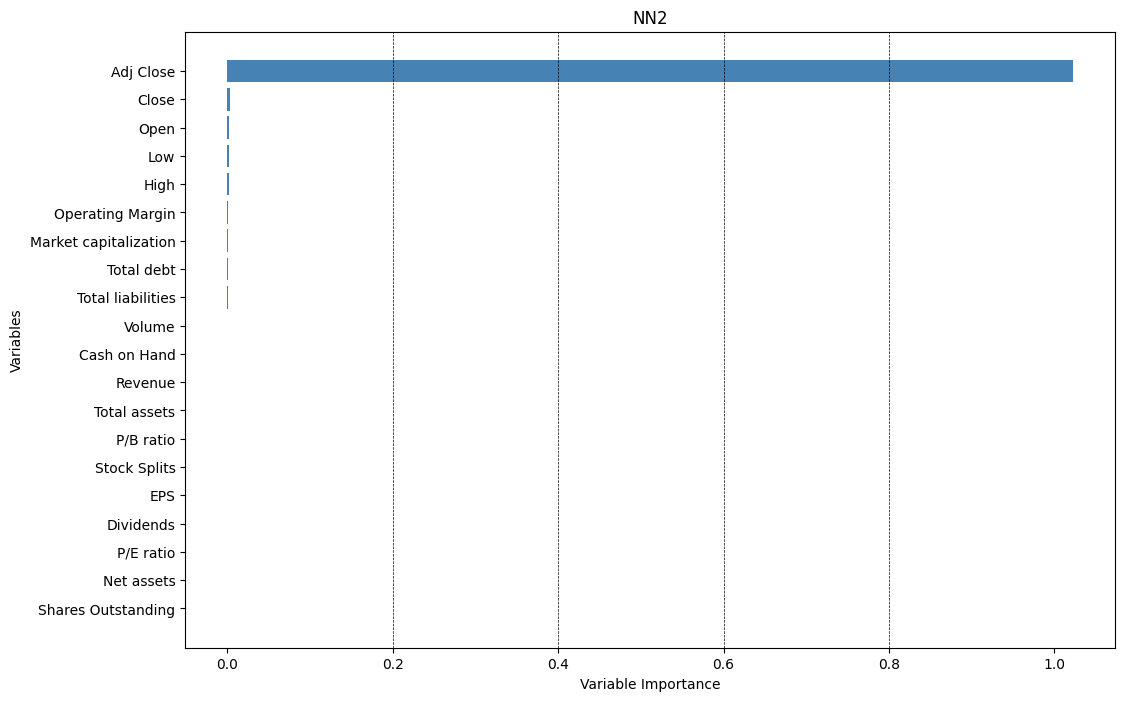

In [72]:
imp = varimp.sort_values('var_imp', ascending=False).head(20)

df_plot = pd.DataFrame({
    'Variable': imp['Variable'],
    'Importance': imp['var_imp']
})

plt.figure(figsize=(12, 8))
plt.barh(df_plot['Variable'], df_plot['Importance'], color='steelblue')
plt.gca().invert_yaxis()



plt.axvline(0.2, color='black', linestyle='--', linewidth=0.5)
plt.axvline(0.4, color='black', linestyle='--', linewidth=0.5)
plt.axvline(0.6, color='black', linestyle='--', linewidth=0.5)
plt.axvline(0.8, color='black', linestyle='--', linewidth=0.5)

plt.xlabel('Variable Importance')
plt.ylabel('Variables')
plt.title('NN2')

plt.show()

In [73]:
varimp=varimp[["Variable", "var_imp"]]
varimp.to_csv(r'C:/Users/CMert/Documents/Data bachelorprojekt/variable-comparison/varimp NN2.csv', index = False)

# Preparations for machine learning portfolios

In [89]:
# The following is a table comparing the estimiates to the true values of each stock for every day in the test set.

# Remember to rerun df_final for all stock!

symbols = df_final.loc[dates_all.index, 'Symbol']  


comparison = pd.DataFrame({
    'Date': dates_all,  
    'y_hat': predictions_all.tolist(),
    'y_true': y_test_list_all.tolist(),
    'Symbol': symbols  
})


comparison['MonthYear'] = comparison['Date'].dt.to_period('M')

comparison = comparison.sort_values(by=['Date', 'Symbol'], ascending=True)
comparison = comparison.set_index(['MonthYear', 'Symbol'])

comparison

Date      y_hat     y_true
MonthYear Symbol                                 
1973-03   AA     1973-03-30   1.546193   1.679166
          AEM    1973-03-30   2.475324   3.268339
          AEP    1973-03-30   1.680946   0.890009
          AIG    1973-03-30  12.196314  11.045241
          ALX    1973-03-30   1.732620   1.699244
...                     ...        ...        ...
2024-12   ZVRA   2024-12-31   7.378789   8.120000
          ZVSA   2024-12-31   1.785716   1.465000
          ZWS    2024-12-31  34.713116  38.980000
          ZYME   2024-12-31  12.980563  14.890000
          ZYXI   2024-12-31   7.161102   8.200000

[1220042 rows x 3 columns]

In [27]:
# Save the df for the Diebold-Mariano test

ols= comparison.reset_index()
ols.to_csv(r"C:/Users/CMert/Documents/Data bachelorprojekt/Estimater/Fake NN2 Estimates", index = False)

In [75]:
ols = pd.read_csv("C:/Users/CMert/Documents/Data bachelorprojekt/Estimater/Fake NN2 Estimates")

Lad Adj Close være betegnet som P. Afkastraten udregnes ved:

$$ r_{t+1} = \frac{P_{t+1}}{P_t} -1 $$
Og

$$ \hat{r}_{t+1} = \frac{\hat{P}_{t+1}}{P_t} -1 $$

Merafkastsraten udregnes ved:

$$ er_{t+1} = r_{t+1} - r_{f,t+1}  $$
Og

$$ \hat{er}_{t+1} = \hat{r}_{t+1} - r_{f,t+1}  $$


Her er $R_{f,t}$ notation for den risikofrie rate i periode t. Fordi vi arbejder med amerikanske aktier, har vi fundet data for obligationsraten i USA, og benytter dette som den risikofrie rate.
Dataen er fundet her: https://fred.stlouisfed.org/series/DGS20

In [76]:
#Calculate estimiated future return, where distance between each period is one month. Notice that for the return estimate, then for P_t we use the actual adj close price, since at time t it is known: 

comparison = ols

comparison['Date'] = pd.to_datetime(comparison['Date'])


comparison = comparison.sort_values(by=['Symbol', 'Date']).reset_index(drop=True)


comparison["ret_t+1_hat"] = comparison["y_hat"] / comparison.groupby("Symbol")["y_true"].shift(1) - 1
comparison["ret_t+1_true"] = comparison["y_true"] / comparison.groupby("Symbol")["y_true"].shift(1) - 1


comparison_ret_1m = comparison.sort_values(by=['Date', 'Symbol'], ascending=True)


comparison_ret_1m


,MonthYear,Symbol,Date,y_hat,y_true,ret_t+1_hat,ret_t+1_true
302,1973-03,AA,1973-03-30,1.546193,1.679166,NaN,NaN
22037,1973-03,AEM,1973-03-30,2.475324,3.268339,NaN,NaN
23252,1973-03,AEP,1973-03-30,1.680946,0.890009,NaN,NaN
31740,1973-03,AIG,1973-03-30,12.196314,11.045241,NaN,NaN
47458,1973-03,ALX,1973-03-30,1.732620,1.699244,NaN,NaN
...,...,...,...,...,...,...,...
1219517,2024-12,ZVRA,2024-12-31,7.378789,8.120000,-0.115253,-0.026379
1219543,2024-12,ZVSA,2024-12-31,1.785716,1.465000,0.684638,0.382076
1219697,2024-12,ZWS,2024-12-31,34.713116,38.980000,-0.069353,0.045040
1219790,2024-12,ZYME,2024-12-31,12.980563,14.890000,-0.113350,0.017077


In [77]:
# Drop rows where either 'ret_t-(y_hat)	' or 'ret_t-(y_true)' is NaN
comparison_ret_1m = comparison_ret_1m.dropna(subset=['ret_t+1_hat', 'ret_t+1_true']).reset_index(drop=False)



In [78]:
treasury_securities = pd.read_excel("C:/Users/CMert/Documents/Data bachelorprojekt/Treasury securities.xlsx")

In [79]:
treasury_securities['Date'] = pd.to_datetime(treasury_securities['Date'])
comparison_ret_1m['Date'] = pd.to_datetime(comparison_ret_1m['Date'])

new_comparison = pd.merge(comparison_ret_1m, treasury_securities, on='Date', how='inner')

new_comparison = new_comparison[new_comparison['Treasury Securities'] != 0]

new_comparison['Treasury Securities'] = new_comparison['Treasury Securities'] / (12*100)

new_comparison['exc_ret_t+1_hat'] = new_comparison['ret_t+1_hat']-new_comparison['Treasury Securities']

new_comparison['exc_ret_t+1_true'] = new_comparison['ret_t+1_true']-new_comparison['Treasury Securities']

new_comparison = new_comparison.sort_values(by=['Date', 'Symbol'], ascending=True)

new_comparison = new_comparison.drop("index", axis = 1)

new_comparison


,MonthYear,Symbol,Date,y_hat,y_true,ret_t+1_hat,ret_t+1_true,Treasury Securities,exc_ret_t+1_hat,exc_ret_t+1_true
0,2007-01,A,2007-01-31,20.420029,20.303795,-0.002133,-0.007813,0.004183,-0.006316,-0.011996
1,2007-01,AA,2007-01-31,55.764629,66.871361,-0.137433,0.034366,0.004183,-0.141617,0.030182
2,2007-01,AAL,2007-01-31,51.883556,49.295952,-0.016885,-0.065916,0.004183,-0.021068,-0.070100
3,2007-01,AAME,2007-01-31,3.013263,3.011133,0.012764,0.012048,0.004183,0.008581,0.007865
4,2007-01,AAON,2007-01-31,3.075211,3.072437,0.011466,0.010553,0.004183,0.007282,0.006370
...,...,...,...,...,...,...,...,...,...,...
797696,2024-10,ZVSA,2024-10-31,2.253963,1.074000,0.121375,-0.465672,0.003817,0.117558,-0.469488
797697,2024-10,ZWS,2024-10-31,33.348309,39.820000,-0.074088,0.105598,0.003817,-0.077905,0.101781
797698,2024-10,ZYME,2024-10-31,12.149266,14.090000,-0.113192,0.028467,0.003817,-0.117009,0.024651
797699,2024-10,ZYXI,2024-10-31,7.758773,8.320000,-0.100953,-0.035921,0.003817,-0.104770,-0.039738


In [80]:
# Remember to rerun df_final, when adding 'Market cap' since it is standardized:

new_comparison['Date'] = pd.to_datetime(new_comparison['Date'])
df_final['Date'] = pd.to_datetime(df_final['Date'])

final_comparison = pd.merge(new_comparison, df_final[["Date", "Symbol"]], on=["Date", "Symbol"], how="inner")


final_comparison = final_comparison.sort_values(by=['Date', 'Symbol'], ascending=True)

In [81]:
final_comparison = final_comparison.rename(columns={'Treasury Securities' : 'Risk free rate'})

In [37]:
# We now limit the df to the following decade 2014-01 and 2023-12
final_comparison = final_comparison[
    (final_comparison["MonthYear"] >= "2014-01") &
    (final_comparison["MonthYear"] <= "2023-12")
]


In [82]:
final_comparison

,MonthYear,Symbol,Date,y_hat,y_true,ret_t+1_hat,ret_t+1_true,Risk free rate,exc_ret_t+1_hat,exc_ret_t+1_true
0,2007-01,A,2007-01-31,20.420029,20.303795,-0.002133,-0.007813,0.004183,-0.006316,-0.011996
1,2007-01,AA,2007-01-31,55.764629,66.871361,-0.137433,0.034366,0.004183,-0.141617,0.030182
2,2007-01,AAL,2007-01-31,51.883556,49.295952,-0.016885,-0.065916,0.004183,-0.021068,-0.070100
3,2007-01,AAME,2007-01-31,3.013263,3.011133,0.012764,0.012048,0.004183,0.008581,0.007865
4,2007-01,AAON,2007-01-31,3.075211,3.072437,0.011466,0.010553,0.004183,0.007282,0.006370
...,...,...,...,...,...,...,...,...,...,...
797695,2024-10,ZVSA,2024-10-31,2.253963,1.074000,0.121375,-0.465672,0.003817,0.117558,-0.469488
797696,2024-10,ZWS,2024-10-31,33.348309,39.820000,-0.074088,0.105598,0.003817,-0.077905,0.101781
797697,2024-10,ZYME,2024-10-31,12.149266,14.090000,-0.113192,0.028467,0.003817,-0.117009,0.024651
797698,2024-10,ZYXI,2024-10-31,7.758773,8.320000,-0.100953,-0.035921,0.003817,-0.104770,-0.039738


In [83]:
# Index every month in order

unique_months = final_comparison['MonthYear'].unique()
unique_months.sort()

month_indices = list(range(1, len(unique_months) + 1))

df_month_merge = pd.DataFrame({
    'MonthYear': unique_months,
    'MonthIndex': month_indices
})

final_comparison = final_comparison.merge(df_month_merge, on='MonthYear', how='left')


In [84]:
final_comparison

,MonthYear,Symbol,Date,y_hat,y_true,ret_t+1_hat,ret_t+1_true,Risk free rate,exc_ret_t+1_hat,exc_ret_t+1_true,MonthIndex
0,2007-01,A,2007-01-31,20.420029,20.303795,-0.002133,-0.007813,0.004183,-0.006316,-0.011996,1
1,2007-01,AA,2007-01-31,55.764629,66.871361,-0.137433,0.034366,0.004183,-0.141617,0.030182,1
2,2007-01,AAL,2007-01-31,51.883556,49.295952,-0.016885,-0.065916,0.004183,-0.021068,-0.070100,1
3,2007-01,AAME,2007-01-31,3.013263,3.011133,0.012764,0.012048,0.004183,0.008581,0.007865,1
4,2007-01,AAON,2007-01-31,3.075211,3.072437,0.011466,0.010553,0.004183,0.007282,0.006370,1
...,...,...,...,...,...,...,...,...,...,...,...
797695,2024-10,ZVSA,2024-10-31,2.253963,1.074000,0.121375,-0.465672,0.003817,0.117558,-0.469488,214
797696,2024-10,ZWS,2024-10-31,33.348309,39.820000,-0.074088,0.105598,0.003817,-0.077905,0.101781,214
797697,2024-10,ZYME,2024-10-31,12.149266,14.090000,-0.113192,0.028467,0.003817,-0.117009,0.024651,214
797698,2024-10,ZYXI,2024-10-31,7.758773,8.320000,-0.100953,-0.035921,0.003817,-0.104770,-0.039738,214


In [85]:
# Function to add the decile rank of each stock in each month

def decile_ranks(df):
    df = df.sort_values(by='exc_ret_t+1_hat', ascending=True)
    
    df['Decile rank'] = pd.qcut(df['exc_ret_t+1_hat'], 10, labels=False, duplicates='drop')
    return df


final_comparison = final_comparison.groupby('MonthYear', group_keys=False).apply(decile_ranks)


In [86]:
# A dictionray of the stock history of each decile:

decile_dataframes = {}

# Loop through each decile rank
for decile in range(10):
    
    decile_df = final_comparison[final_comparison['Decile rank'] == decile].copy()
    
    decile_df.reset_index(drop=True, inplace=True)
    
    decile_dataframes[f'decile_rank_{decile}'] = decile_df

In [87]:
decile_dataframes['decile_rank_9']

,MonthYear,Symbol,Date,y_hat,y_true,ret_t+1_hat,ret_t+1_true,Risk free rate,exc_ret_t+1_hat,exc_ret_t+1_true,MonthIndex,Decile rank
0,2007-01,EXPO,2007-01-31,4.093075,4.019284,0.007415,-0.010747,0.004183,0.003232,-0.014930,1,9.0
1,2007-01,CGNX,2007-01-31,4.471669,4.477859,0.007487,0.008882,0.004183,0.003304,0.004698,1,9.0
2,2007-01,RLI,2007-01-31,3.950497,3.971909,0.007550,0.013011,0.004183,0.003367,0.008828,1,9.0
3,2007-01,DAIO,2007-01-31,3.758557,3.750000,0.007656,0.005362,0.004183,0.003473,0.001179,1,9.0
4,2007-01,GLW,2007-01-31,14.087659,13.839716,0.007658,-0.010077,0.004183,0.003475,-0.014260,1,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...
79839,2024-10,CLOE,2024-10-31,4.916385,0.020139,242.925027,-0.000800,0.003817,242.921211,-0.004617,214,9.0
79840,2024-10,NUVO,2024-10-31,1.775789,0.002000,1364.991735,0.538462,0.003817,1364.987919,0.534645,214,9.0
79841,2024-10,AAGR,2024-10-31,1.775119,0.000200,4436.797778,-0.500000,0.003817,4436.793961,-0.503817,214,9.0
79842,2024-10,EVA,2024-10-31,1.775727,0.000100,4438.318292,-0.750000,0.003817,4438.314476,-0.753817,214,9.0


# Machine learning portfolios

For hvert decildatasæt og derfra for hver måned tilføjer vi to vægte for hver aktie. Vægtene er henholdsvis 'equal weights' og 'market capitalization weights' som udregnes ved:

$$w^{eq} = \frac{1}{N}, $$
hvor N er antallet af aktier for den respektive måned. Vægten baseret på aktiens markedsværdi udregnes ved:

$$w^{mc}_{i} = \frac{mc_i}{\sum_{j = 1}^N mc_j}, $$
hvor $i$ og $j$ er en indexering af aktierne for den respektive måned.

In [45]:

for decile_dfs_key, decile_dfs_value in decile_dataframes.items():
    
    decile_dfs_value.sort_values(['MonthYear'], inplace=True)
    decile_dfs_value.reset_index(drop=True, inplace=True)
    
    # Calculate eq weights:
    decile_dfs_value['eq_weights'] = 1 / decile_dfs_value.groupby('MonthYear')['Symbol'].transform('count')
    
    
    decile_dataframes[decile_dfs_key] = decile_dfs_value

I artiklen S. 2261 (PDF S. 39) er porteføljens merafkastsrate givet ved:

$$\hat{er}^P_{t+1} = \sum_{i = 1}^N w^P_{i,t} \cdot \hat{er}_{i,t+1} , $$
hvor P angiver den enkelte portefølje, specificeret ved variablerne Decile rank og MonthYear.

In [46]:
# Weighted true excess return at t+1 for each stock:

for decile_dfs_key, decile_dfs_value in decile_dataframes.items():
    # Calculate the product of equal weights and excess return, to find the equal weighted excess return of each stock:
    decile_dfs_value['exc_ret_t+1_true_eq'] = decile_dfs_value['exc_ret_t+1_true'] * decile_dfs_value['eq_weights']
    
    
    
    decile_dataframes[decile_dfs_key] = decile_dfs_value

In [47]:
# Weighted true portfolio excess return at t+1:

for decile_dfs_key, decile_dfs_value in decile_dataframes.items():
    
    decile_dfs_value.sort_values(['MonthYear'], inplace=True)
    decile_dfs_value.reset_index(drop=True, inplace=True)
    
    # Calculate true eq portfolio excess return:
    decile_dfs_value['portfolio_true_exc_ret_eq'] = decile_dfs_value.groupby('MonthYear')['exc_ret_t+1_true_eq'].transform('sum')
    
    
    decile_dataframes[decile_dfs_key] = decile_dfs_value

In [48]:
# Weighted predicted excess return at t+1 for each stock:

for decile_dfs_key, decile_dfs_value in decile_dataframes.items():
    # Calculate the product of equal weights and excess return, to find the equal weighted excess return of each stock:
    decile_dfs_value['exc_ret_t+1_hat_eq'] = decile_dfs_value['exc_ret_t+1_hat'] * decile_dfs_value['eq_weights']
    
    
    
    decile_dataframes[decile_dfs_key] = decile_dfs_value

In [49]:
# Weighted predicted portfolio excess return at t+1:

for decile_dfs_key, decile_dfs_value in decile_dataframes.items():
    
    decile_dfs_value.sort_values(['MonthYear'], inplace=True)
    decile_dfs_value.reset_index(drop=True, inplace=True)
    
    # Calculate true eq portfolio excess return:
    decile_dfs_value['portfolio_hat_exc_ret_eq'] = decile_dfs_value.groupby('MonthYear')['exc_ret_t+1_hat_eq'].transform('sum')

    
    decile_dataframes[decile_dfs_key] = decile_dfs_value

In [50]:
# Weighted true return at t+1 for each stock:

for decile_dfs_key, decile_dfs_value in decile_dataframes.items():
    # Calculate the product of equal weights and return, to find the equal weighted return of each stock:
    decile_dfs_value['ret_t+1_true_eq'] = decile_dfs_value['ret_t+1_true'] * decile_dfs_value['eq_weights']
    

    
    decile_dataframes[decile_dfs_key] = decile_dfs_value

In [51]:
# Weighted true portfolio return at t+1:

for decile_dfs_key, decile_dfs_value in decile_dataframes.items():
    
    decile_dfs_value.sort_values(['MonthYear'], inplace=True)
    decile_dfs_value.reset_index(drop=True, inplace=True)
    
    # Calculate true eq portfolio return:
    decile_dfs_value['portfolio_true_ret_eq'] = decile_dfs_value.groupby('MonthYear')['ret_t+1_true_eq'].transform('sum')
    
    
    decile_dataframes[decile_dfs_key] = decile_dfs_value

In [52]:
decile_dataframes['decile_rank_5'].columns

Index(['MonthYear', 'Symbol', 'Date', 'y_hat', 'y_true', 'ret_t+1_hat',
       'ret_t+1_true', 'Risk free rate', 'exc_ret_t+1_hat', 'exc_ret_t+1_true',
       'MonthIndex', 'Decile rank', 'eq_weights', 'exc_ret_t+1_true_eq',
       'portfolio_true_exc_ret_eq', 'exc_ret_t+1_hat_eq',
       'portfolio_hat_exc_ret_eq', 'ret_t+1_true_eq', 'portfolio_true_ret_eq'],
      dtype='object')

In [53]:
portfolio_returns2 = {}

for decile_dfs_key, decile_dfs_value in decile_dataframes.items():

    portfolio_variables = decile_dfs_value[['MonthYear',
                                   
                                   'portfolio_true_exc_ret_eq',
                                   
                                   
                                   'portfolio_hat_exc_ret_eq',
                                   
                                   'portfolio_true_ret_eq',
                                   
                                   
                                   'Decile rank',
                                   'MonthIndex',
                                   
                                   ]].copy()
    
    portfolio_variables = portfolio_variables.drop_duplicates()
    
    portfolio_variables.reset_index(drop=True, inplace=True)
    
    portfolio_returns2[decile_dfs_key] = portfolio_variables


In [54]:
portfolio_returns2['decile_rank_9']

,MonthYear,portfolio_true_exc_ret_eq,portfolio_hat_exc_ret_eq,portfolio_true_ret_eq,Decile rank,MonthIndex
0,2014-01,0.081452,0.148685,0.084244,9,1
1,2014-02,0.226587,0.973731,0.229346,9,2
2,2014-03,-0.003972,0.184367,-0.001214,9,3
3,2014-04,0.008261,0.197196,0.010944,9,4
4,2014-05,0.055684,0.218533,0.058226,9,5
...,...,...,...,...,...,...
115,2023-08,0.002428,3.972771,0.006087,9,116
116,2023-09,-0.061243,4.149403,-0.057143,9,117
117,2023-10,0.182144,5.244044,0.186485,9,118
118,2023-11,0.200015,5.111428,0.203948,9,119


Pr. vores finansieringsbog, så gælder: "For any portfolio, P, we define the Sharpe-ratio as excess return relative to standard deviation", jf. S. 57, "Finance 1 and Beyond":

$$Sharpe-ratio^P = \frac{er^P_{t+1}}{\sigma_R^P}$$

In [55]:
#Find Sharpe-ratio of each decile rank dataframe:

for decile_key, portfolio_df in portfolio_returns2.items():
    
    # Calculate average of the true portfolio excess return
    mean_ER_true_eq = portfolio_df['portfolio_true_exc_ret_eq'].mean()
    
    # Calculate average of the predicted portfolio excess return
    mean_ER_pred_eq = portfolio_df['portfolio_hat_exc_ret_eq'].mean()
    
    # Calculate standard deviation of the true portfolio excess returns
    std_R_true_eq = portfolio_df['portfolio_true_ret_eq'].std()
    
    # Calculate annualized Sharpe ratio of the true excess returns
    sharpe_ratio_eq = (mean_ER_true_eq / std_R_true_eq) * np.sqrt(12)
    
   
    portfolio_df['Mean_true_ER_eq'] = mean_ER_true_eq
    portfolio_df['Mean_pred_ER_eq'] = mean_ER_pred_eq
    portfolio_df['Std_true_ER_eq'] = std_R_true_eq
    portfolio_df['Sharpe_ratio_eq'] = sharpe_ratio_eq
    

    portfolio_returns2[decile_key] = portfolio_df

# Zero-net-investment long-short portfolios

At shorte en aktie betyder at du låner aktier, som du vælger at sælge, fordi du forudsiger at de vil falde i pris og dermed kan du købe dem billiger og tjene differencen. At longe en aktie betyder at du køber en aktie, fordi du forventer den stiger i pris og dermed kan tjene differencen. Derfor vil man ifølge zero-net-investment teorien bruge alle ens penge på long-investment, hvor pengene kommer af de aktier man lige har shortet. Dvs. til tid 0 skal ens portefølje have følgende værdi:

$$\sum_{i = 1}^N w_i \cdot P^{long}_{i,0} - \sum_{j = 1}^M w_j \cdot P^{short}_{j,0} = 0$$
Her vælges vægtene for både short- og long-aktierne som før, hvor summen af alle vægte skal være 1. Afkastet for zero-net-investment er dermed til tid t givet ved:

$$\sum_{i = 1}^N w_i \cdot P^{long}_{i,t} - \sum_{j = 1}^M w_j \cdot P^{short}_{j,t} = profit$$

In [56]:
# Create the tables that show the performance of the machine learning portfolios

long_df = portfolio_returns2['decile_rank_9'].copy()
short_df = portfolio_returns2['decile_rank_0'].copy()

long_df['Investment type'] = 'long'
short_df['Investment type'] = 'short'


calc_df = pd.merge(long_df, short_df, on='MonthIndex', suffixes=('_long', '_short'))

In [57]:

# Calculate zero-net investment excess returns
calc_df['true_ER_zni_eq'] = calc_df['portfolio_true_exc_ret_eq_long'] - calc_df['portfolio_true_exc_ret_eq_short']
calc_df['pred_ER_zni_eq'] = calc_df['portfolio_hat_exc_ret_eq_long'] - calc_df['portfolio_hat_exc_ret_eq_short']

# Calculate the means
mean_true_ER_zni_eq = calc_df['true_ER_zni_eq'].mean()

mean_pred_ER_zni_eq = calc_df['pred_ER_zni_eq'].mean()

# # Calculate zero-net investment returns that we need for Sharpe ratio
calc_df['true_R_zni_eq'] = calc_df['portfolio_true_ret_eq_long'] - calc_df['portfolio_true_ret_eq_short']

std_true_R_zni_eq = calc_df['true_R_zni_eq'].std()

# Sharpe ratio
sharpe_ratio_eq_zni = (mean_true_ER_zni_eq / std_true_R_zni_eq) * np.sqrt(12)




In [58]:
calc_df

,MonthYear_long,portfolio_true_exc_ret_eq_long,portfolio_hat_exc_ret_eq_long,portfolio_true_ret_eq_long,Decile rank_long,MonthIndex,Mean_true_ER_eq_long,Mean_pred_ER_eq_long,Std_true_ER_eq_long,Sharpe_ratio_eq_long,...,portfolio_true_ret_eq_short,Decile rank_short,Mean_true_ER_eq_short,Mean_pred_ER_eq_short,Std_true_ER_eq_short,Sharpe_ratio_eq_short,Investment type_short,true_ER_zni_eq,pred_ER_zni_eq,true_R_zni_eq
0,2014-01,0.081452,0.148685,0.084244,9,1,0.123863,1.414982,0.389379,1.101944,...,0.056654,0,0.002479,-0.162246,0.063538,0.135139,short,0.027590,0.178677,0.027590
1,2014-02,0.226587,0.973731,0.229346,9,2,0.123863,1.414982,0.389379,1.101944,...,-0.019014,0,0.002479,-0.162246,0.063538,0.135139,short,0.248360,1.004242,0.248360
2,2014-03,-0.003972,0.184367,-0.001214,9,3,0.123863,1.414982,0.389379,1.101944,...,-0.055014,0,0.002479,-0.162246,0.063538,0.135139,short,0.053800,0.207438,0.053800
3,2014-04,0.008261,0.197196,0.010944,9,4,0.123863,1.414982,0.389379,1.101944,...,-0.004077,0,0.002479,-0.162246,0.063538,0.135139,short,0.015021,0.221368,0.015021
4,2014-05,0.055684,0.218533,0.058226,9,5,0.123863,1.414982,0.389379,1.101944,...,0.049142,0,0.002479,-0.162246,0.063538,0.135139,short,0.009084,0.240131,0.009084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,2023-08,0.002428,3.972771,0.006087,9,116,0.123863,1.414982,0.389379,1.101944,...,-0.059752,0,0.002479,-0.162246,0.063538,0.135139,short,0.065838,4.187771,0.065838
116,2023-09,-0.061243,4.149403,-0.057143,9,117,0.123863,1.414982,0.389379,1.101944,...,-0.076091,0,0.002479,-0.162246,0.063538,0.135139,short,0.018948,4.365954,0.018948
117,2023-10,0.182144,5.244044,0.186485,9,118,0.123863,1.414982,0.389379,1.101944,...,0.063126,0,0.002479,-0.162246,0.063538,0.135139,short,0.123359,5.463879,0.123359
118,2023-11,0.200015,5.111428,0.203948,9,119,0.123863,1.414982,0.389379,1.101944,...,0.057430,0,0.002479,-0.162246,0.063538,0.135139,short,0.146519,5.329881,0.146519


In [59]:
performance_data = []

for i in range(10):
    decile_key = f'decile_rank_{i}'
    decile_df = portfolio_returns2[decile_key]
    
    mean_pred_ER_eq = decile_df['Mean_pred_ER_eq'].iloc[0]
    mean_true_ER_eq = decile_df['Mean_true_ER_eq'].iloc[0]
    std_true_ER_eq = decile_df['Std_true_ER_eq'].iloc[0]
    sharpe_ratio_eq = decile_df['Sharpe_ratio_eq'].iloc[0]
    
    performance_data.append([mean_pred_ER_eq, mean_true_ER_eq, std_true_ER_eq, sharpe_ratio_eq])

# The zero-net-investments caluclations will be used as H-L row
performance_data.append([mean_pred_ER_zni_eq, mean_true_ER_zni_eq, std_true_R_zni_eq, sharpe_ratio_eq_zni])


columns = ['Pred Avg', 'True Avg', 'SD', 'SR']
index = ['Low(L)', '1', '2', '3', '4', '5', '6', '7', '8', 'High(H)', 'H-L']

ML_performance_eq_table = pd.DataFrame(performance_data, columns=columns, index=index)



In [60]:
ML_performance_eq_table

,Pred Avg,True Avg,SD,SR
Low(L),-0.162246,0.002479,0.063538,0.135139
1,-0.124078,0.006405,0.064091,0.346211
2,-0.097517,0.004165,0.059040,0.244398
3,-0.077860,0.002364,0.055605,0.147276
4,-0.062209,0.002077,0.054372,0.132308
5,-0.047909,0.002379,0.051871,0.158846
6,-0.031974,0.003691,0.048325,0.264610
7,-0.009846,0.004839,0.044864,0.373623
8,0.053865,0.009415,0.057095,0.571224
High(H),1.414982,0.123863,0.389379,1.101944


In [61]:
ML_performance_eq_table.to_csv(r"C:/Users/CMert/Documents/Data bachelorprojekt/ML_Sharpe_results/Fake NN2_eq.csv")

# The second table of the machine learning portfolios performance

Maximum drawdown er i artiklen defineret ved:

$$MaxDD = \max _{0 \leq t_{1} \leq t_{2} \leq T}\left(Y_{t_{1}}-Y_{t_{2}}\right),  $$
hvor $Y_t$ er den akkumulerede log afkast givet ved:

$$ r = \log\left(\prod_{i = 1}^{n}(1+r_i) \right)$$

$$ = \sum_{i = 1}^{n} \log \left( 1+r_i \right), $$
hvor n er antallet af porteføljer

In [62]:

# Calculate the maximum drawdown
def max_dd(returns):
    
    draw_downs = []
    exc_ret = returns.copy()
    
    # Calculate cumulative log excess returns
    exc_ret = np.log(1 + exc_ret).cumsum()
    
    
    peak = exc_ret.iloc[0]
    
    for i in range(1, len(exc_ret)):
        current = exc_ret.iloc[i]
        
        if current > peak:
            peak = current  
        else:
            drawdown = peak - current  
            draw_downs.append(drawdown)
    
    if draw_downs:
        max_drawdown = max(draw_downs)
    else:
        max_drawdown = 0  # In the off chance the stock is ever increasing
    
    return max_drawdown

maxdd_eq = max_dd(calc_df['true_ER_zni_eq'])


maxdd_eq_pct = maxdd_eq * 100

print("MaxDD EQ: ", maxdd_eq_pct)

MaxDD EQ:  5.071237605426759


# Max 1M loss
I artiklen defineret som den mest extreme, negative månedlige afkast.

In [63]:
max_1m_loss_eq_pct = calc_df['true_ER_zni_eq'].min()*(-100)

print("Max 1M EQ: ", max_1m_loss_eq_pct)

Max 1M EQ:  3.902374563983087


# Turnover

I artiklen er turnover defineret ved:

$$ \frac{1}{T} \sum_{t = 1}^T \left(\sum_{i = 1}^n   \bigg| w_{i,t+1} - \frac{w_{i,t}(1+r_{i,t+1})}{1+ \sum_{j = 1}^n  w_{j,t} \cdot r_{j,t+1}}  \bigg|  \right)  $$

In [65]:
# Get the t+1 weights for both eq and mc weights:

for decile_dfs_key, decile_dfs_value in decile_dataframes.items():
    
    decile_dfs_value.sort_values(['Symbol', 'MonthYear'], inplace=True)
    decile_dfs_value.reset_index(drop=True, inplace=True)
    
    # Create next month's weights for eq_weights and mc_weights, and if they dont exist set to 0
    decile_dfs_value['eq_weights_t+1'] = decile_dfs_value.groupby('Symbol')['eq_weights'].shift(-1).fillna(0)

    
    decile_dataframes[decile_dfs_key] = decile_dfs_value


In [66]:
def turnover(long_df, short_df, weight_t0, weight_t1, exc_ret_t1):
    turnover_each_month = []
    
    # Combine long and short portfolios into one portfolio
    zero_net = pd.concat([long_df, short_df], ignore_index=True)
    
    zero_net.sort_values(['MonthYear'], inplace=True)
    zero_net.reset_index(drop=True, inplace=True)
    
    months = zero_net['MonthYear'].unique()
    
    for t in months[:-1]:  # Exclude the last month since it has no t+1 weights
        
        current_month = zero_net[zero_net['MonthYear'] == t]
        
        # Calculate the denominator for month t
        denominator = 1 + (current_month[weight_t0] * current_month[exc_ret_t1]).sum()
        
        # Calculate the turnover for each stock
        current_month['fraction'] = (
            current_month[weight_t0] * (1 + current_month[exc_ret_t1]) / denominator
        )
        current_month['abs_diff'] = abs(
            current_month[weight_t1] - current_month['fraction']
        )
        
        # Sum the absolute differences for month t
        turnover_each_month.append(current_month['abs_diff'].sum())
    
    # Calculate the average turnover across all months
    turnover = sum(turnover_each_month) / len(turnover_each_month)
    return turnover


In [67]:
long_df = decile_dataframes['decile_rank_9']
short_df = decile_dataframes['decile_rank_0']


weight_eq = 'eq_weights'
weight_t1_eq = 'eq_weights_t+1'
exc_ret_t1 = 'exc_ret_t+1_true'

turnover_eq = turnover(long_df, short_df, weight_eq, weight_t1_eq, exc_ret_t1)





turnover_eq_pct = turnover_eq*100
print("Turnover EQ: ", turnover_eq_pct)

Turnover EQ:  42.284988839868504


In [68]:
eq_table_OLS = pd.DataFrame({
    "NN2" : [maxdd_eq_pct,
                max_1m_loss_eq_pct,
                turnover_eq_pct
                ]
})


eq_table_OLS.index = ['Max DD(%)', "Max 1M loss(%)", "Turnover(%)"]

In [69]:
eq_table_OLS

,NN2
Max DD(%),5.071238
Max 1M loss(%),3.902375
Turnover(%),42.284989


In [70]:
eq_table_OLS.to_csv(r"C:/Users/CMert/Documents/Data bachelorprojekt/ML Performance tables/Fake NN2_eq.csv")

# Cumulative log returns of portfolio rank 0 and 9

In [71]:
calc_df

,MonthYear_long,portfolio_true_exc_ret_eq_long,portfolio_hat_exc_ret_eq_long,portfolio_true_ret_eq_long,Decile rank_long,MonthIndex,Mean_true_ER_eq_long,Mean_pred_ER_eq_long,Std_true_ER_eq_long,Sharpe_ratio_eq_long,...,portfolio_true_ret_eq_short,Decile rank_short,Mean_true_ER_eq_short,Mean_pred_ER_eq_short,Std_true_ER_eq_short,Sharpe_ratio_eq_short,Investment type_short,true_ER_zni_eq,pred_ER_zni_eq,true_R_zni_eq
0,2014-01,0.081452,0.148685,0.084244,9,1,0.123863,1.414982,0.389379,1.101944,...,0.056654,0,0.002479,-0.162246,0.063538,0.135139,short,0.027590,0.178677,0.027590
1,2014-02,0.226587,0.973731,0.229346,9,2,0.123863,1.414982,0.389379,1.101944,...,-0.019014,0,0.002479,-0.162246,0.063538,0.135139,short,0.248360,1.004242,0.248360
2,2014-03,-0.003972,0.184367,-0.001214,9,3,0.123863,1.414982,0.389379,1.101944,...,-0.055014,0,0.002479,-0.162246,0.063538,0.135139,short,0.053800,0.207438,0.053800
3,2014-04,0.008261,0.197196,0.010944,9,4,0.123863,1.414982,0.389379,1.101944,...,-0.004077,0,0.002479,-0.162246,0.063538,0.135139,short,0.015021,0.221368,0.015021
4,2014-05,0.055684,0.218533,0.058226,9,5,0.123863,1.414982,0.389379,1.101944,...,0.049142,0,0.002479,-0.162246,0.063538,0.135139,short,0.009084,0.240131,0.009084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,2023-08,0.002428,3.972771,0.006087,9,116,0.123863,1.414982,0.389379,1.101944,...,-0.059752,0,0.002479,-0.162246,0.063538,0.135139,short,0.065838,4.187771,0.065838
116,2023-09,-0.061243,4.149403,-0.057143,9,117,0.123863,1.414982,0.389379,1.101944,...,-0.076091,0,0.002479,-0.162246,0.063538,0.135139,short,0.018948,4.365954,0.018948
117,2023-10,0.182144,5.244044,0.186485,9,118,0.123863,1.414982,0.389379,1.101944,...,0.063126,0,0.002479,-0.162246,0.063538,0.135139,short,0.123359,5.463879,0.123359
118,2023-11,0.200015,5.111428,0.203948,9,119,0.123863,1.414982,0.389379,1.101944,...,0.057430,0,0.002479,-0.162246,0.063538,0.135139,short,0.146519,5.329881,0.146519


<Axes: xlabel='MonthYear_long'>

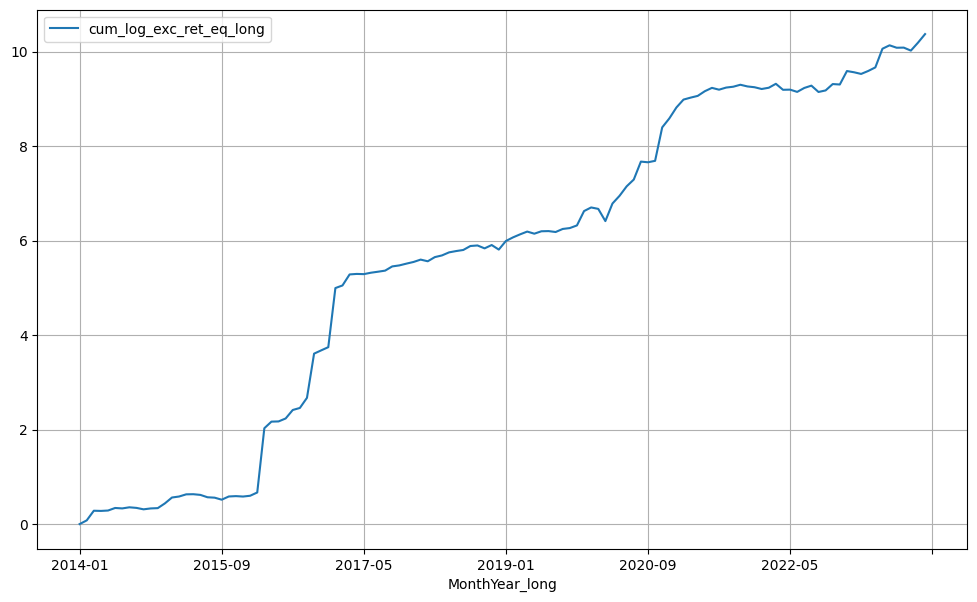

In [72]:
long_df = calc_df.copy()


long_df = long_df.set_index("MonthYear_long")
long_df.sort_values(['MonthYear_long'], inplace = True)


long_df['true_exc_ret_eq_t'] = long_df['portfolio_true_exc_ret_eq_long'].shift(1)


long_df['cum_log_exc_ret_eq_long'] =(np.log(1 + long_df['true_exc_ret_eq_t'])).cumsum()

long_df['cum_log_exc_ret_eq_long'].iloc[0] = 0


long_df[['cum_log_exc_ret_eq_long']].plot(grid=True, figsize=(12, 7))




<Axes: xlabel='MonthYear_long'>

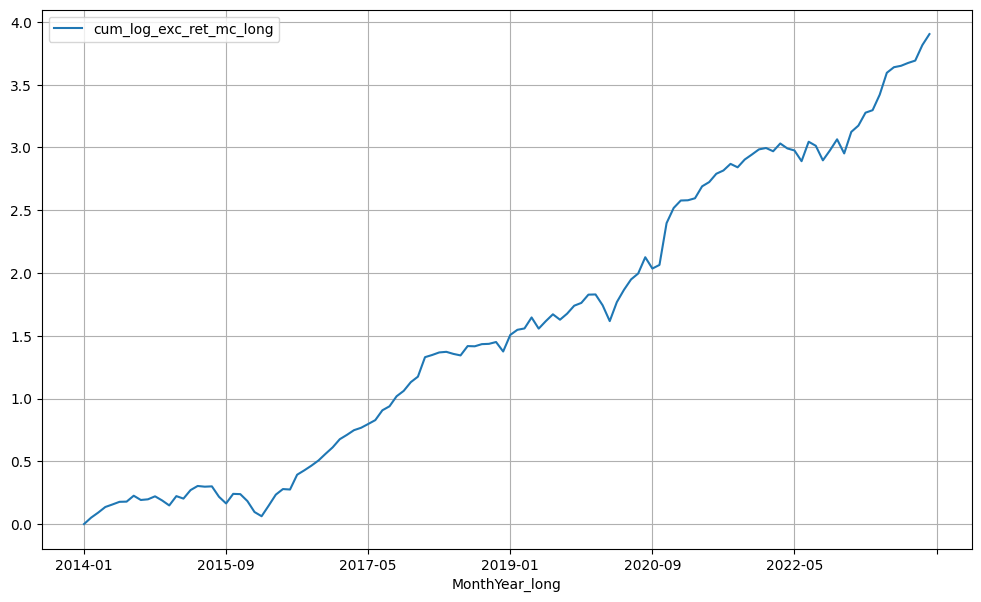

In [57]:
long_df = calc_df.copy()


long_df = long_df.set_index("MonthYear_long")
long_df.sort_values(['MonthYear_long'], inplace = True)


long_df['true_exc_ret_mc_t'] = long_df['portfolio_true_exc_ret_mc_long'].shift(1)


long_df['cum_log_exc_ret_mc_long'] =(np.log(1 + long_df['true_exc_ret_mc_t'])).cumsum()

long_df['cum_log_exc_ret_mc_long'].iloc[0] = 0

long_df[['cum_log_exc_ret_mc_long']].plot(grid=True, figsize=(12, 7))




<Axes: xlabel='MonthYear_short'>

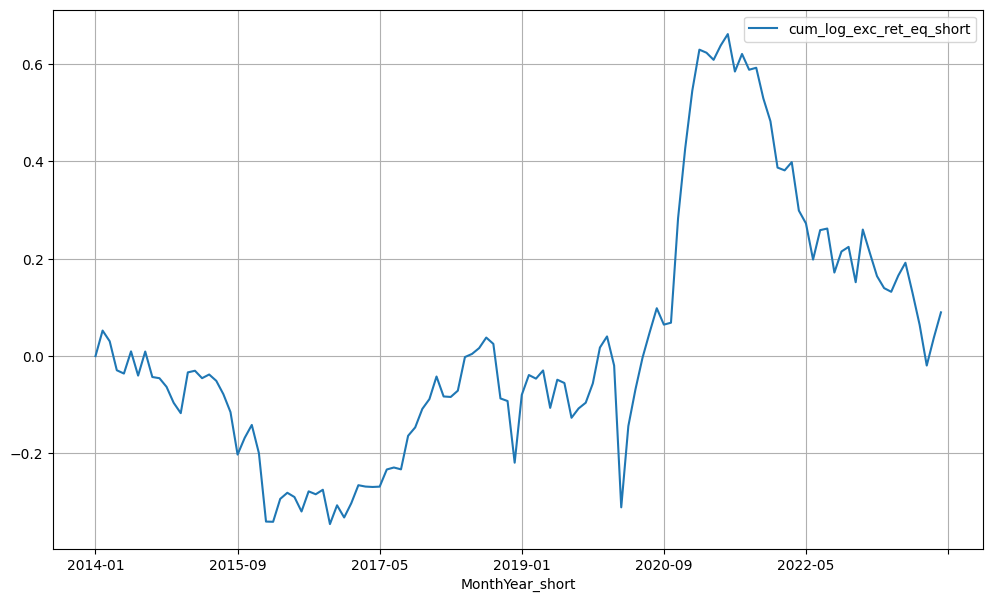

In [73]:
short_df = calc_df.copy()


short_df = long_df.set_index("MonthYear_short")
short_df.sort_values(['MonthYear_short'], inplace = True)


short_df['true_exc_ret_eq_t'] = short_df['portfolio_true_exc_ret_eq_short'].shift(1)


short_df['cum_log_exc_ret_eq_short'] = (np.log(1 + short_df['true_exc_ret_eq_t'])).cumsum()

short_df['cum_log_exc_ret_eq_short'].iloc[0] = 0


short_df[['cum_log_exc_ret_eq_short']].plot(grid=True, figsize=(12, 7))




<Axes: xlabel='MonthYear_short'>

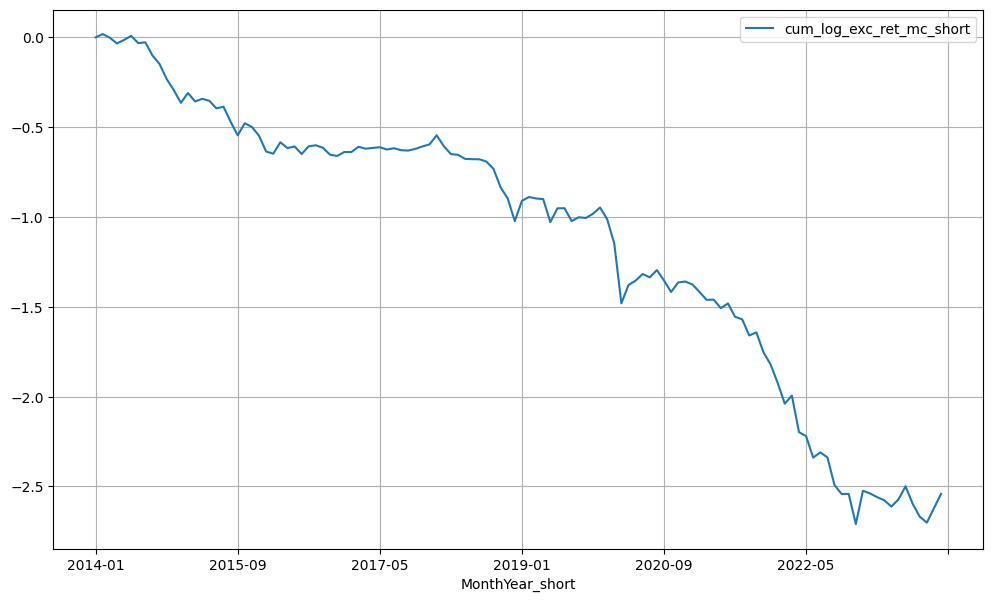

In [58]:
short_df = calc_df.copy()


short_df = long_df.set_index("MonthYear_short")
short_df.sort_values(['MonthYear_short'], inplace = True)


short_df['true_exc_ret_mc_t'] = short_df['portfolio_true_exc_ret_mc_short'].shift(1)


short_df['cum_log_exc_ret_mc_short'] = (np.log(1 + short_df['true_exc_ret_mc_t'])).cumsum()

short_df['cum_log_exc_ret_mc_short'].iloc[0] = 0


short_df[['cum_log_exc_ret_mc_short']].plot(grid=True, figsize=(12, 7))




<Axes: xlabel='MonthYear_long'>

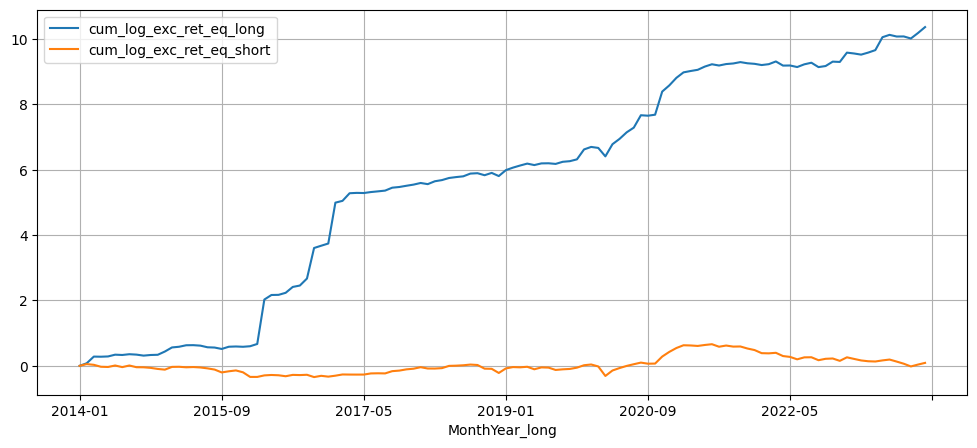

In [74]:
long_short_OLS_eq = pd.merge(long_df[['cum_log_exc_ret_eq_long']], short_df[['cum_log_exc_ret_eq_short']],left_index=True, right_index=True)


long_short_OLS_eq[["cum_log_exc_ret_eq_long", "cum_log_exc_ret_eq_short"]].plot(grid=True,figsize=(12, 5))

In [56]:
long_short_OLS_eq.to_csv(r'C:/Users/CMert/Documents/Data bachelorprojekt/ML grafer/NN2 eq.csv')

<Axes: xlabel='MonthYear_long'>

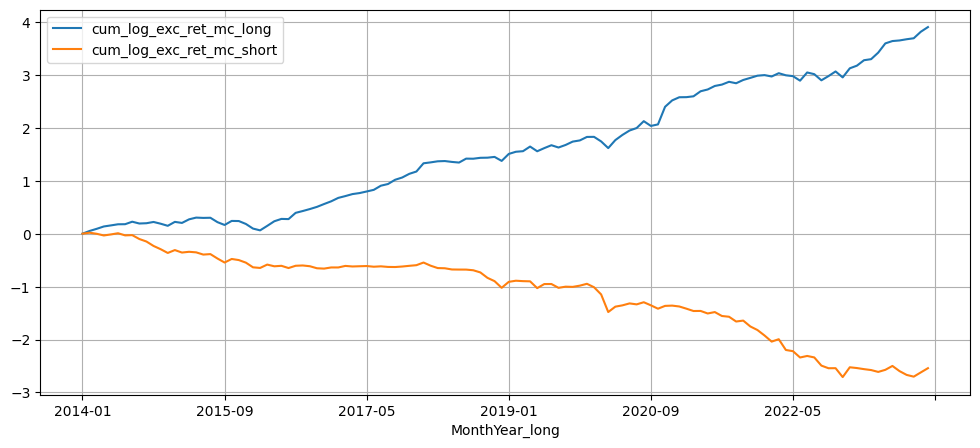

In [59]:

long_short_OLS_mc = pd.merge(long_df[['cum_log_exc_ret_mc_long']], short_df[['cum_log_exc_ret_mc_short']],left_index=True, right_index=True)


long_short_OLS_mc[["cum_log_exc_ret_mc_long", "cum_log_exc_ret_mc_short"]].plot(grid=True,figsize=(12, 5))

In [60]:
long_short_OLS_mc.to_csv(r'C:/Users/CMert/Documents/Data bachelorprojekt/ML grafer/NN2 mc.csv')

# Graveyard